**Advanced Topicsin Electronics Engineering (539426)**

# Deep Learning with TensorFlow / Tranfer Learning And FineTune

อาจารย์ ดร.มาโนทย์ มาปะโท

ภาคการศึกษาที่ 3 ปีการศึกษา 2565

สาขาวิชาวิศวกรรมอิเล็กทรอนิกส์ มหาวิทยาลัยเทคโนโลยีสุรนารี Suranaree University of Technology

# Import section

In [ ]:
# Code for module import
from google.colab import drive
import os, shutil, pathlib,random
from keras.utils import image_dataset_from_directory
import tensorflow as tf
import numpy as np
from keras import layers, models
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score, precision_score,accuracy_score
import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
# Code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Code copy data from google drive
os.chdir("/content/")
shutil.copyfile(src="/content/drive/MyDrive/examdata.zip",
dst="/content/examdata.zip")

'/content/examdata.zip'

In [ ]:
# Code for unzip
!unzip -qq examdata.zip

In [ ]:
#ถ้ามีไฟล์ชื่อ .ipynb_checkpoints ปรากฎขึ้นหลังทำการ rename folder ให้ลบด้วยคำสั่งนี้
!rm -rf /content/food11/.ipynb_checkpoints

*italicized text*## แปะภาพไฟล์ที่อยู่ใน /content/ ที่ได้แก้ไขไดเรคทอรี และพร้อมใช้งงาน

## ภาพ
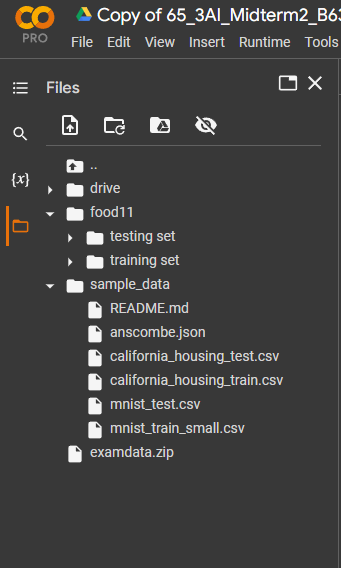

In [ ]:
# code เรียกดูจำนวน file และ จำนวน class
class_list=train_dataset = image_dataset_from_directory("/content/food11/testing set")
print(class_list.class_names)

Found 1100 files belonging to 11 classes.
['apple_pie', 'cheesecake', 'chicken_curry', 'french_fries', 'fried_rice', 'hamburger', 'hot_dog', 'ice_cream', 'omelette', 'pizza', 'sushi']


In [ ]:
#Code for class management
def remove_folder(path):
  if os.path.exists(path):
    shutil.rmtree(path)
def RemoveSomeClass(classlist,keep,maindatafolder):
  for m in ["testing set","training set"]: # look into each folder
    for i in classlist.class_names: # list of all class
      if i not in keep: #delete other, keep these class
        remove_folder("%s/%s/%s"%(maindatafolder,m,i)) #call remove_folder function
        print("%s/%s/%s"%(maindatafolder,m,i))
RemoveSomeClass(class_list,
['french_fries', 'hamburger', 'ice_cream', 'pizza'], # keep these, romove other
"/content/food11")

/content/food11/testing set/apple_pie
/content/food11/testing set/cheesecake
/content/food11/testing set/chicken_curry
/content/food11/testing set/fried_rice
/content/food11/testing set/hot_dog
/content/food11/testing set/omelette
/content/food11/testing set/sushi
/content/food11/training set/apple_pie
/content/food11/training set/cheesecake
/content/food11/training set/chicken_curry
/content/food11/training set/fried_rice
/content/food11/training set/hot_dog
/content/food11/training set/omelette
/content/food11/training set/sushi


In [ ]:
# code เรียกดู file และ จำนวน class ที่เหลือ
class_list=train_dataset = image_dataset_from_directory("/content/food11/testing set")
print(class_list.class_names)

Found 400 files belonging to 4 classes.
['french_fries', 'hamburger', 'ice_cream', 'pizza']


In [ ]:
#code นำเข้าข้อมูล
def Import_and_Resize(dataset_dir,image_size=180,batch_size=32,shuffle_set=False):
  class_list=train_dataset = image_dataset_from_directory("/content/food11/training set",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set)
  #set shuffle=True when train, and change shuffle=False when plot CF matrix

  validation_dataset = image_dataset_from_directory("/content/food11/training set",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set)
  #set shuffle=True when train, and change shuffle=False when plot CF matrix

  test_dataset = image_dataset_from_directory("/content/food11/testing set",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set)
  #set shuffle=True when train, and change shuffle=False when plot CF matrix

  print("\nClass name list: %s" %class_list.class_names)
  return train_dataset,validation_dataset,test_dataset,class_list
  # return train_dataset,test_dataset,class_list

Class: hamburger 
Pic name: 68979.jpg


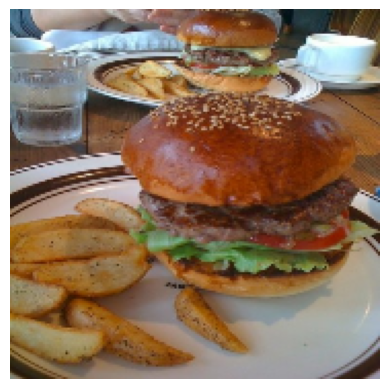

In [ ]:
# code แสดงภาพต้นแบบโดยให้เลือกภาพแบบสุ่ม
def load_and_prep_image(filename, img_shape=180):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  return img
listclass=os.listdir("/content/food11/testing set")
randclass=random.choice(listclass)
listpic=os.listdir("/content/food11/testing set/%s"%randclass)
randpic=random.choice(listpic)
img=load_and_prep_image("/content/food11/testing set/%s/%s"%(randclass,randpic))
print("Class:",randclass,"\nPic name:",randpic)
img1 = img/255.0
plt.imshow(img1)
plt.axis(False)
plt.show()

#Tranfer Learning

In [ ]:
# Code นำเข้าข้อมูลแบบ shuffle
train_dataset,validation_dataset,test_dataset,class_list=Import_and_Resize("/content/food11/", image_size=224, shuffle_set=True)

Found 3600 files belonging to 4 classes.
Found 3600 files belonging to 4 classes.
Found 400 files belonging to 4 classes.

Class name list: ['french_fries', 'hamburger', 'ice_cream', 'pizza']


In [ ]:
conv_base = VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
data_augmentation = keras.Sequential(
[ layers.RandomFlip("horizontal"),
layers.RandomRotation(0.2),
layers.RandomZoom(0.2)])

In [ ]:
conv_base.trainable=False
inputs = keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)

# outputs = layers.Dense(1, activation="sigmoid")(x)
outputs=layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer="Adam",
metrics=["accuracy"])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_3   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_3 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               6422

In [ ]:
# Code train
hist = model.fit(train_dataset,epochs=10,validation_data=validation_dataset,)

Epoch 1/10
113/113 [==============================] - 30s 251ms/step - loss: 9.3131 - accuracy: 0.8169 - val_loss: 1.0435 - val_accuracy: 0.9400
Epoch 2/10
113/113 [==============================] - 29s 250ms/step - loss: 1.9431 - accuracy: 0.9306 - val_loss: 1.9803 - val_accuracy: 0.9314
Epoch 3/10
113/113 [==============================] - 29s 252ms/step - loss: 1.0659 - accuracy: 0.9642 - val_loss: 0.9353 - val_accuracy: 0.9700
Epoch 4/10
113/113 [==============================] - 29s 254ms/step - loss: 1.2805 - accuracy: 0.9650 - val_loss: 0.5689 - val_accuracy: 0.9822
Epoch 5/10
113/113 [==============================] - 29s 256ms/step - loss: 1.3292 - accuracy: 0.9703 - val_loss: 0.7981 - val_accuracy: 0.9719
Epoch 6/10
113/113 [==============================] - 29s 255ms/step - loss: 0.7724 - accuracy: 0.9783 - val_loss: 1.0205 - val_accuracy: 0.9717
Epoch 7/10
113/113 [==============================] - 29s 255ms/step - loss: 1.5996 - accuracy: 0.9719 - val_loss: 1.4271 - val_ac

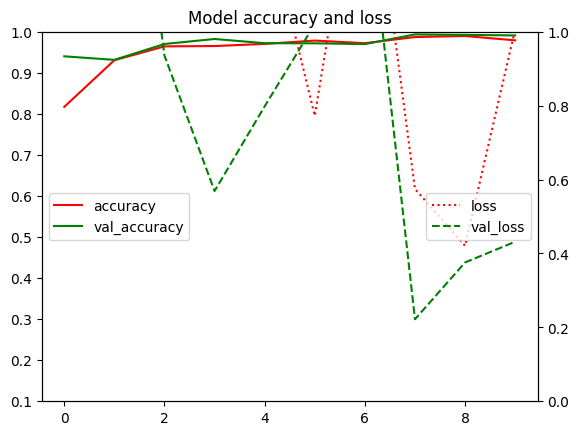

In [ ]:
# Code plot loss and accuracy
def plotloss_acc(train_history,acclim,losslim):
  fig=plt.figure()
  ax1=fig.gca()
  ax1.set_title("Model accuracy and loss")
  ax1.plot(train_history.history['accuracy'],label="accuracy",c='r')
  ax1.plot(train_history.history['val_accuracy'],label="val_accuracy",c='g')
  ax1.set_ylim(acclim)
  ax2=ax1.twinx()
  ax2.plot(train_history.history['loss'],label="loss",c='r',ls=":")
  ax2.plot(train_history.history['val_loss'],label="val_loss",c='g',ls="--")
  ax2.set_ylim(losslim)
  ax1.legend(loc='center left')
  ax2.legend(loc='center right')
  plt.show()
plotloss_acc(hist,[0.1,1],[0,1])

In [ ]:
# Code save model
model.save("/content/drive/MyDrive/Ai_Work/foodmodel/pre.h5")

#Model Loading And Predicting

---


In [ ]:
# Code for model loading
mymodel1 = keras.models.load_model('/content/drive/MyDrive/Ai_Work/foodmodel/pre.h5')

In [ ]:
# Code แสดงการทดสอบภาพจำนวน 3 ภาพ โดยใช้ภาพจากชุด test
class_names=class_list.class_names
def multi_pred(model, filename, class_names, img_shape=180):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[tf.argmax(pred[0])]
  print(pred)
  print(tf.argmax(pred[0]))
  img1 = img/255.
  plt.imshow(img1)
  plt.title("Prediction: %s @ %.4f "%(pred_class,pred[0][tf.argmax(pred[0])]))
  plt.axis(False);
  plt.show()
  return pred



1/1 [==============================] - 0s 21ms/step
[[0. 1. 0. 0.]]
tf.Tensor(1, shape=(), dtype=int64)


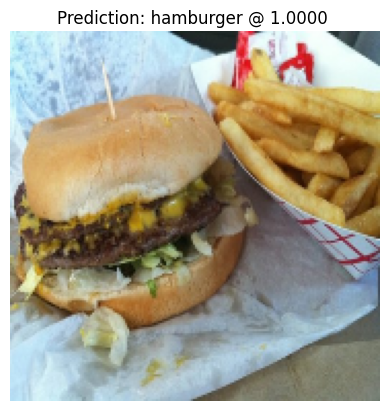

array([[0., 1., 0., 0.]], dtype=float32)

In [ ]:
multi_pred(mymo,'/content/food11/testing set/hamburger/110991.jpg',class_names)


1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 1.]]
tf.Tensor(3, shape=(), dtype=int64)


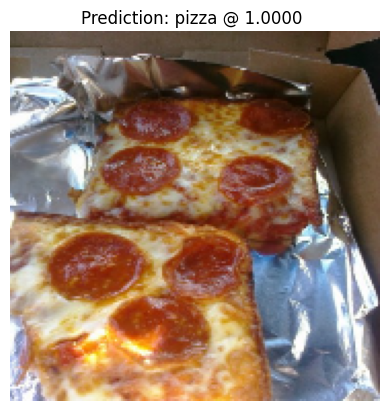

array([[0., 0., 0., 1.]], dtype=float32)

In [ ]:
multi_pred(mymo,'/content/food11/testing set/pizza/11297.jpg',class_names)


1/1 [==============================] - 0s 20ms/step
[[0. 0. 1. 0.]]
tf.Tensor(2, shape=(), dtype=int64)


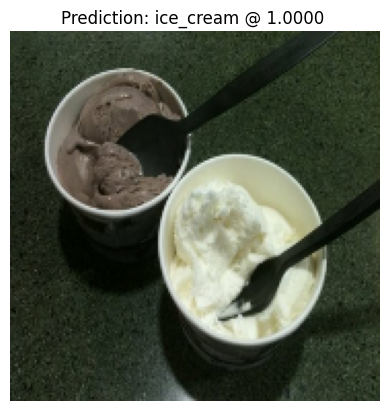

array([[0., 0., 1., 0.]], dtype=float32)

In [ ]:
multi_pred(mymo,'/content/food11/testing set/ice_cream/137146.jpg',class_names)


#Confusion matrix

> บล็อกที่มีการเยื้อง


* ## กำหนดให้วาดภาพขนาด 8x8

In [ ]:
# Code confusion_matrix function
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Code import data with no shuffle
train_dataset,validation_dataset,test_dataset,class_list=Import_and_Resize("/content/food11/training set",
image_size=180,
shuffle_set=False)

Found 3600 files belonging to 4 classes.
Found 3600 files belonging to 4 classes.
Found 400 files belonging to 4 classes.

Class name list: ['french_fries', 'hamburger', 'ice_cream', 'pizza']


113/113 [==============================] - 7s 62ms/step


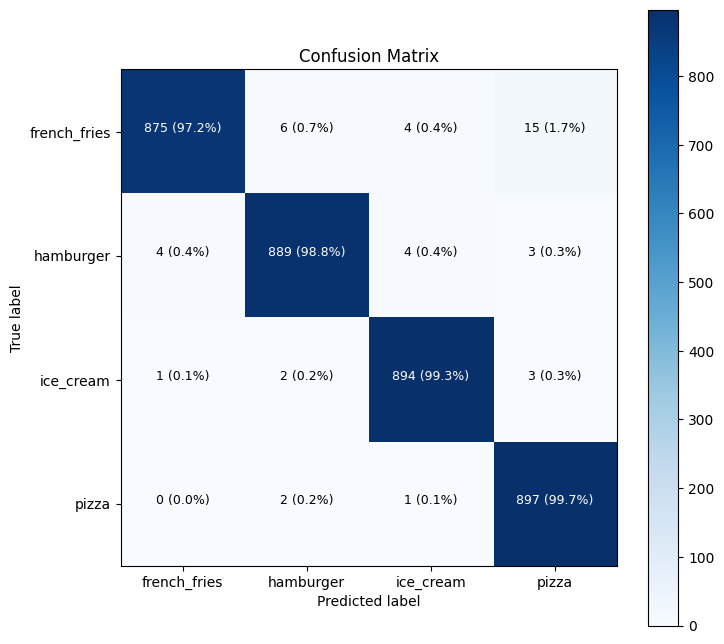

In [ ]:
# Code วาด confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with
  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)
  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
    # Label the axes
  ax.set(title="Confusion Matrix",
    xlabel="Predicted label",
    ylabel="True label",
    xticks=np.arange(n_classes), # create enough axis slots for each class
    yticks=np.arange(n_classes),
    xticklabels=labels, # axes will labeled with class names (if they exist) or ints
    yticklabels=labels)
    # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
    # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.
    # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
    horizontalalignment="center",
    color="white" if cm[i, j] > threshold else "black",
    size=text_size)
def built_dataforCFmat(dataset):
  y_probs = mymo.predict(dataset)
  y_preds = y_probs.argmax(axis=1)
  y_train = np.concatenate([y for x, y in dataset], axis=0)
  return y_preds, y_train

y_preds, y_train = built_dataforCFmat(train_dataset)
make_confusion_matrix(y_true=y_train, y_pred=y_preds,classes=class_list.class_names,figsize=(8, 8),text_size=9)

In [ ]:
mymodel1 = keras.models.load_model('/content/drive/MyDrive/Ai_Work/foodmodel/pre.h5')

In [ ]:
a = [0,1,2,3,4,5,6,7,8,9]
a[:-2]

#Fine Tune

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-2]:
  layer.trainable= False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
hist = mymodel1.fit(train_dataset,epochs=3,validation_data=validation_dataset,)

Epoch 1/3
113/113 [==============================] - 31s 272ms/step - loss: 0.2393 - accuracy: 0.9231 - val_loss: 0.1541 - val_accuracy: 0.9472
Epoch 2/3
113/113 [==============================] - 31s 271ms/step - loss: 0.1861 - accuracy: 0.9425 - val_loss: 0.1559 - val_accuracy: 0.9494
Epoch 3/3
113/113 [==============================] - 30s 269ms/step - loss: 0.1675 - accuracy: 0.9489 - val_loss: 0.1206 - val_accuracy: 0.9603


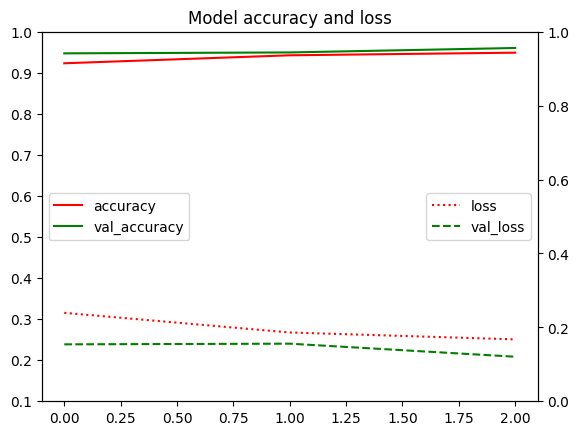

In [ ]:
# Code plot loss and accuracy
def plotloss_acc(train_history,acclim,losslim):
  fig=plt.figure()
  ax1=fig.gca()
  ax1.set_title("Model accuracy and loss")
  ax1.plot(train_history.history['accuracy'],label="accuracy",c='r')
  ax1.plot(train_history.history['val_accuracy'],label="val_accuracy",c='g')
  ax1.set_ylim(acclim)
  ax2=ax1.twinx()
  ax2.plot(train_history.history['loss'],label="loss",c='r',ls=":")
  ax2.plot(train_history.history['val_loss'],label="val_loss",c='g',ls="--")
  ax2.set_ylim(losslim)
  ax1.legend(loc='center left')
  ax2.legend(loc='center right')
  plt.show()
plotloss_acc(hist,[0.1,1],[0,1])

In [ ]:
model.save("/content/drive/MyDrive/Ai_Work/foodmodel/prefine_tne.h5")

In [ ]:
a = [0,1,2,3,4,5,6,7,8,9]
a[:-2]

[0, 1, 2, 3, 4, 5, 6, 7]